# Marcos Barragán Corredera

https://www.linkedin.com/in/marcos-barragán-corredera-7415931b7

# Adrián González Retamosa

https://www.linkedin.com/in/adrián-gonzález-retamosa-b283a51b3

## Machine Learning

## CUNEF

### 04/12/2020

# Exploration and cleaning data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

import sklearn.metrics as skm

import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport 
from sklearn.metrics import plot_confusion_matrix

Load the train and test 

In [2]:
X_train = pd.read_csv('../data/x_train.csv')
X_test = pd.read_csv('../data/x_test.csv')
Y_train = pd.read_csv('../data/y_train.csv')
Y_test = pd.read_csv('../data/y_test.csv')

Load the Pipeline

In [3]:
pl2 = '../pipelines/tratamiento1.sav'
tratamiento1 = pickle.load(open(pl2, 'rb'))

We build the Random Forest model:

In [7]:
# Levantamos el objeto (no es el entrenamiento)

rf_m = Pipeline(steps=[
                      ('preprocesador', tratamiento1), 
                      ('clasificador', RandomForestClassifier(n_estimators = 500,
                                                              n_jobs = -1,
                                                              random_state=1978))])

rf_m.fit(X_train, Y_train)

/Users/adrian_gr/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['int_rate', 'annual_inc', 'fico_range_low', 'fico_range_high',
       'pub_rec', 'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_bc_sats', 'num_tl_120dpd_2m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit'],
      dtype='object'))])),
     

We calculate the score for the training samples and we obtain it is perfect, which is comprehensible because we are evaluating it over the training sample that we have taken to train and build the model.

In [6]:
rf_m.score(X_train, Y_train)

1.0

If we do the same but with the test samples, the result decreases until 0.9, which is a really good result also.

In [7]:
rf_m.score(X_test, Y_test)

0.8985850077168285

Using the Random Forest model to create our prediction vector:

In [8]:
Y_pred = rf_m.predict(X_test)

The function _predict_proba_ gives the probabilities for the target (0 and 1) in array form. It returns the output's probability to be 0 and the probability to be 1. 

In [9]:
Y_prob = rf_m.predict_proba(X_test)

Printing the results of random forest model for the predicted data, we can notice that the accuracy is really good (a 90%), but also:

+ If we set that somebody is not going to pay, we hit the result 79% of the cases.

+ Moreover, if we establish somebody is going to pay, we hit the 94% of the cases.

In [16]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     34886
           1       0.94      0.93      0.93    103772

    accuracy                           0.90    138658
   macro avg       0.86      0.87      0.87    138658
weighted avg       0.90      0.90      0.90    138658



Let's plot out the ROC curve, confusion matrices and cumulative gains curve to see their behaviour over the predicted data.

__ROC curve__

In [17]:
def roc(model, title):
    
    y_pred_prob = model.predict_proba(X_test)
    
    skplt.metrics.plot_roc(Y_test, Y_prob) # un roc con todas las metricas
    plt.title(f"ROCs curve for {title}.");

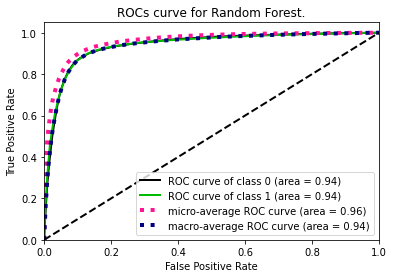

In [18]:
roc(rf_m, 'Random Forest')

We get an area under the curve (AUC) of 0.94, which is a really high result (remember the best is 1).

__Confusion Matrix__

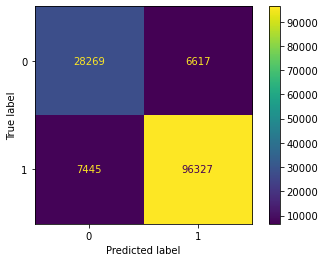

In [19]:
plot_confusion_matrix(rf_m, X=X_test, y_true=Y_test);

__Normalized Confusion Matrix__

Here is where we can check the results we discussed in the _classification_report_ chunk:

+ 79% of accuracy when predicting defaulters.
+ 94% of accuracy when predicting people who is going to pay.

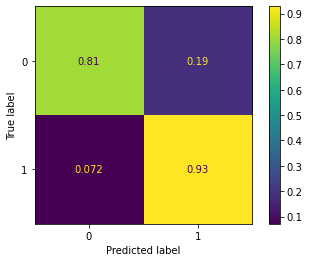

In [16]:
plot_confusion_matrix(rf_m, X_test, y_true=Y_test, normalize='true');

__Cumulative gains curve__

As well as the LR model, it is much more usefull to study the defaulters, because analyzing 20% of the data we will manage to detect more than a 60% of the defaults.

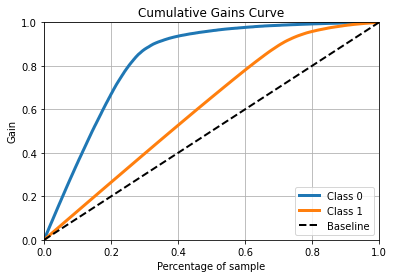

In [18]:
skplt.metrics.plot_cumulative_gain(Y_test, Y_prob);

Finally, we save the model

In [23]:
model = '../modelos/randomforest.sav'
pickle.dump(rf_m, open(model, 'wb'))

### References

+ https://stackoverflow.com/questions/15111408/how-does-sklearn-svm-svcs-function-predict-proba-work-internally
+ https://docs.python.org/3/library/pickle.html
+ https://scikit-learn.org/0.20/modules/generated/sklearn.svm.libsvm.predict_proba.html